In [79]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import talib 
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

from datetime import datetime
from fbprophet import Prophet
from pandas_datareader import data
from pandas.plotting import scatter_matrix

In [80]:
tickers = yf.Tickers("SNP PTR RDS BP XOM TOT CVX MPC LUKOY")
# ^ returns a named tuple of Ticker objects

df = yf.download("SNP PTR BP XOM TOT CVX MPC LUKOY", start="2010-11-30", end="2020-11-30", interval="1mo")

[*********************100%***********************]  8 of 8 completed


In [81]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [82]:
print(all_weekdays)


DatetimeIndex(['2010-11-30', '2010-12-01', '2010-12-02', '2010-12-03',
               '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
               '2010-12-10', '2010-12-13',
               ...
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-30'],
              dtype='datetime64[ns]', length=2610, freq='B')


In [83]:
close.head(100)

Symbols,SNP,PTR,BP,RDS,XOM,TOT,CVX,LUKOY,^GSPC
2010-11-30,71.415382,122.839996,40.000000,6.797,69.559998,48.770000,80.970001,54.810001,1180.550049
2010-12-01,72.707695,127.379997,40.619999,6.851,71.330002,49.570000,82.699997,57.299999,1206.069946
2010-12-02,73.846153,130.300003,41.320000,6.788,71.480003,50.380001,84.500000,57.500000,1221.530029
2010-12-03,72.661537,129.149994,41.490002,6.716,71.190002,51.340000,84.889999,58.299999,1224.709961
2010-12-06,71.099998,128.949997,42.810001,6.711,71.309998,51.520000,84.949997,59.049999,1223.119995
...,...,...,...,...,...,...,...,...,...
2011-04-12,79.500000,148.639999,45.299999,6.009,83.180000,60.779999,104.180000,70.129997,1314.160034
2011-04-13,80.099998,150.669998,45.400002,5.855,83.160004,60.509998,103.809998,70.239998,1314.410034
2011-04-14,79.169228,151.360001,45.540001,5.791,83.440002,60.480000,104.879997,69.190002,1314.520020
2011-04-15,79.061539,152.169998,44.959999,5.897,84.290001,60.400002,106.239998,70.050003,1319.680054


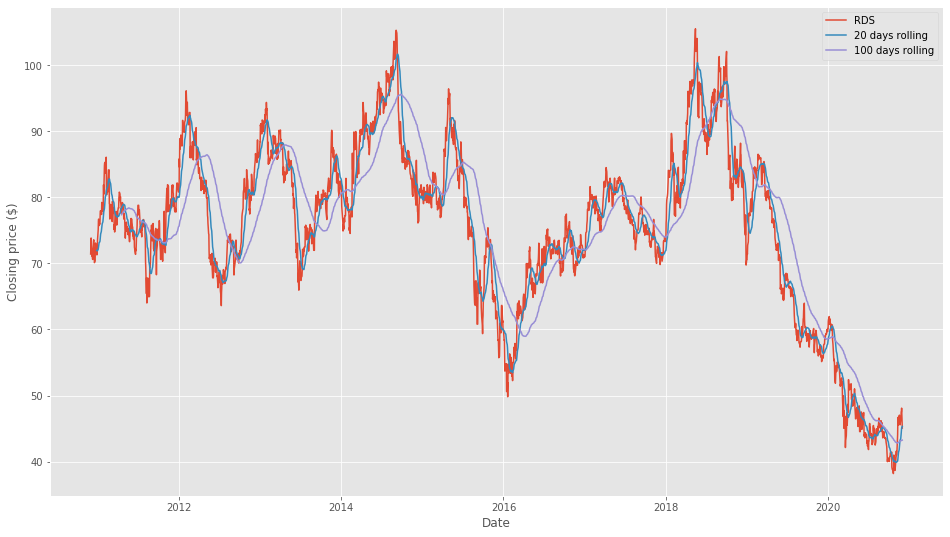

In [86]:
# Get the LUKOY timeseries. This now returns a Pandas Series object indexed by date.
SNP = close.loc[:, 'SNP']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_LUKOY = SNP.rolling(window=20).mean()
long_rolling_LUKOY = SNP.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(LUKOY.index, SNP, label='RDS')
ax.plot(short_rolling_LUKOY.index, short_rolling_LUKOY, label='20 days rolling')
ax.plot(long_rolling_LUKOY.index, long_rolling_LUKOY, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()

# Exploring Moving Average and Return Rate of Stocks
## In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.
## Moving Average



In [56]:
df = yf.download("SNP PTR BP XOM TOT CVX MPC ", start="2010-11-30", end="2020-11-30", interval="1d")
df.head()

[*********************100%***********************]  7 of 7 completed


Adj Close                                                  \
                   BP        CVX MPC        PTR        SNP        TOT   
Date                                                                    
2010-11-29  22.705618  55.237404 NaN  83.914864  40.411739  27.959820   
2010-11-30  22.375570  54.750557 NaN  83.029396  39.298473  27.664841   
2010-12-01  22.722399  55.920338 NaN  86.098053  40.009613  28.118650   
2010-12-02  23.113972  57.137466 NaN  88.071747  40.636082  28.578119   
2010-12-03  23.209074  57.401188 NaN  87.294426  39.984203  29.122679   

                           Close                 ...       Open             \
                  XOM         BP        CVX MPC  ...        SNP        TOT   
Date                                             ...                         
2010-11-29  47.808998  40.590000  81.690002 NaN  ...  71.961540  48.939999   
2010-11-30  47.884735  40.000000  80.970001 NaN  ...  71.461540  48.160000   
2010-12-01  49.103195  40.619999  82.699997 NaN  ...  72.692307  49.459999   
2010-12-02  49.206451  41.320000  84.500000 NaN  ...  73.092308  49.040001   
2010-12-03  49.006813  41.490002  84.889999 NaN  ...  72.192307  50.889999   

                         Volume                                         \
                  XOM        BP       CVX MPC     PTR     SNP      TOT   
Date                                                                     
2010-11-29  68.860001  11978900   9070100 NaN  397800  324200  6863300   
2010-11-30  68.550003  10704400  10366000 NaN  295600  443800  6500100   
2010-12-01  70.379997   8713500  10629600 NaN  465100  389400  5568600   
2010-12-02  71.190002  10237000  10799500 NaN  304700  502800  4340900   
2010-12-03  71.010002   8019900   6724000 NaN  214800  434700  3423200   

                      
                 XOM  
Date                  
2010-11-29  20021200  
2010-11-30  27524300  
2010-12-01  26590200  
2010-12-02  21274800  
2010-12-03  19457100  

[5 rows x 42 columns]

In [57]:

close_px = df['Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

                 BP      CVX      MPC      PTR      SNP      TOT      XOM
Date                                                                     
2010-11-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2010-11-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2010-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2010-12-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2010-12-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN
...             ...      ...      ...      ...      ...      ...      ...
2020-11-20  19.9368  80.7668  33.9475  32.6159  43.1201  36.8369  38.5004
2020-11-23  19.9068  80.7940  33.9990  32.6097  43.1525  36.8810  38.4532
2020-11-24  19.8890  80.8645  34.0599  32.5709  43.1619  36.9403  38.4291
2020-11-25  19.8729  80.9228  34.1278  32.5502  43.1954  37.0024  38.4048
2020-11-27  19.8523  80.9724  34.2005  32.5167  43.2244  37.0651  38.3753

[2518 rows x 7 columns]


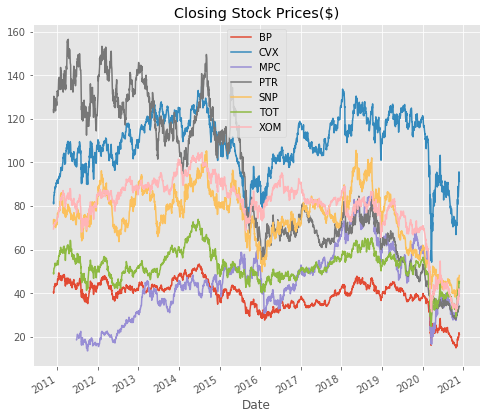

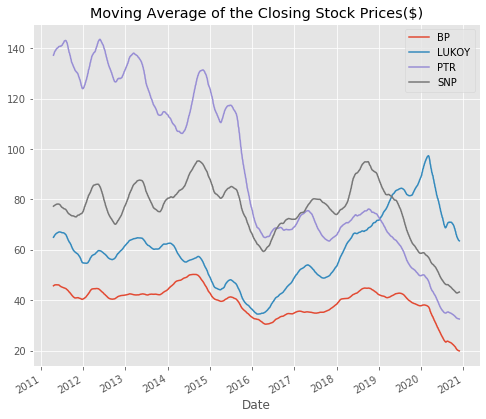

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(title='Closing Stock Prices($)')
mavg.plot(title='Moving Average of the Closing Stock Prices($)')
plt.legend()

## Return Deviation — to determine risk and return

[*********************100%***********************]  4 of 4 completed


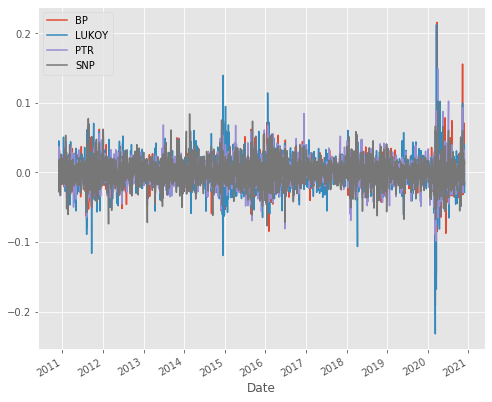

In [64]:
df3 = yf.download("SNP PTR BP LUKOY ", start="2010-11-30", end="2020-11-30", interval="1d")
df3.head()
close_px2 = df3['Close']
mavg = close_px2.rolling(window=100).mean()

rets = close_px2 / close_px2.shift(1) - 1
rets.plot(label='return')

## Analysing  Competitors Stocks
### Taking LUKOY as Benchmark

In [70]:
dfcomp = yf.download("SNP PTR RDS BP MPC TOT  CVX LUKOY", start="2015-11-30", end="2020-11-30", interval="1mo")['Close']
dfcomp.head()

[*********************100%***********************]  8 of 8 completed


,BP,CVX,LUKOY,MPC,PTR,RDS,SNP,TOT
Date,,,,,,,,
2015-12-01,31.260000,89.959999,32.490002,51.840000,65.589996,128.000000,59.980000,44.950001
2016-01-01,32.369999,86.470001,33.919998,41.790001,61.119999,382.950012,56.310001,44.320000
2016-02-01,29.090000,83.440002,35.490002,34.250000,65.540001,2.302000,56.869999,44.709999
2016-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,30.180000,95.400002,38.650002,37.180000,66.300003,155.300003,65.150002,45.419998


In [71]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

Text(0, 0.5, 'Returns BP')

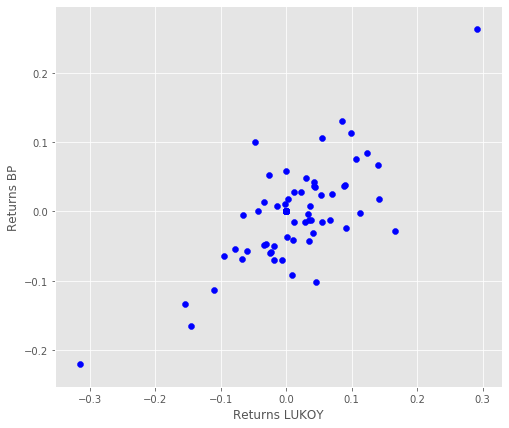

In [74]:
plt.scatter(retscomp.LUKOY, retscomp.BP, COLOR = 'BLUE')
plt.xlabel('Returns LUKOY')
plt.ylabel('Returns BP')

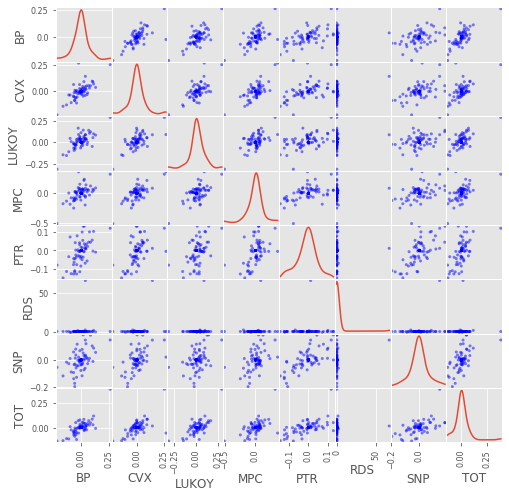

In [77]:
scatter_matrix(retscomp, diagonal='kde', figsize=(8, 8), color='blue');

## Stocks Returns Rate and Risk

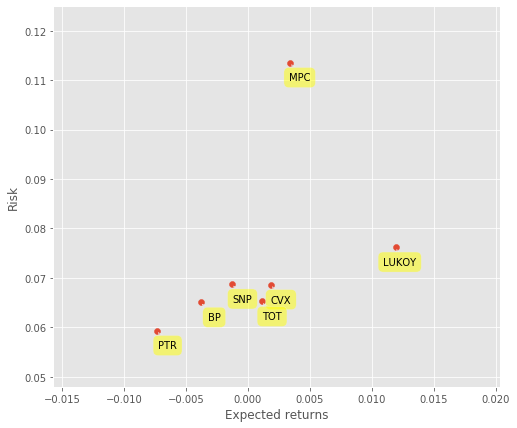

In [42]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    
### Exclude RDS as it distorts the graph

## Predicting Stocks Price

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2010-12-01  63.250898   53.008844   75.397790    63.250898    63.250898   
1   2011-01-01  62.967058   55.177916   77.376280    62.967058    62.967058   
2   2011-02-01  62.683218   55.473740   78.805330    62.683218    62.683218   
3   2011-03-01  62.426846   54.680254   77.788841    62.426846    62.426846   
4   2011-04-01  62.143006   51.924646   76.618126    62.143006    62.143006   
..         ...        ...         ...         ...          ...          ...   
139 2022-07-01  95.102147   83.175253  106.483343    93.701403    96.674964   
140 2022-08-01  95.757811   81.978610  105.689417    94.257630    97.480897   
141 2022-09-01  96.413475   82.701110  105.098598    94.768462    98.230426   
142 2022-10-01  97.047989   83.793187  108.177053    95.260726    98.993979   
143 2022-11-01  97.703654   86.078606  110.997717    95.789020    99.802414   

     additive_terms  additive_terms_lower  additive

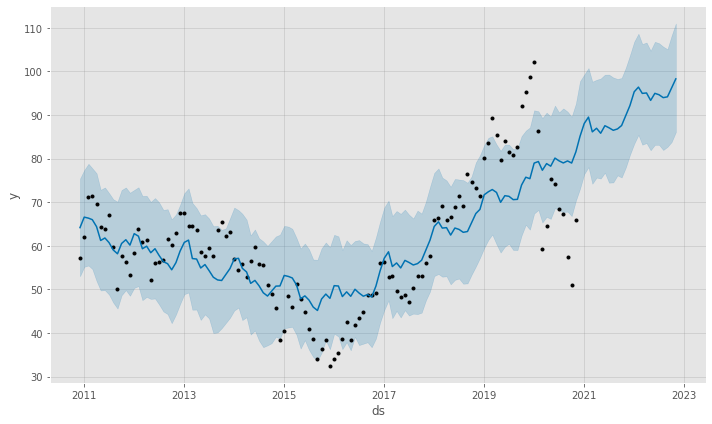

In [52]:
df_LUKOY = pd.read_csv('LUKOY.csv')

#creating dataframe
new_LUKOY = pd.DataFrame(index=range(0,len(df_LUKOY)),columns=['Date', 'Close'])
new_LUKOY ['Date'] = pd.to_datetime(new_LUKOY.Date,format='%Y-%m-%d')
new_LUKOY .index = new_LUKOY['Date']

#preparing data
df_LUKOY['ds'] = df_LUKOY['Date']
df_LUKOY['y'] = df_LUKOY['Close']

#fit the model
model = Prophet()
model.fit(df_LUKOY)

#predict
future = model.make_future_dataframe(periods=24, freq='MS')
forecast_LUKOY = model.predict(future)



model.plot(forecast_LUKOY)
print(forecast_LUKOY)
forecast_LUKOY.to_csv('LUKOY_forecast.csv', index=True)